# Item I

Binary classification to predict fraud in transactions with credit cards using a Perceptron with a layer hides done only with numpy. Classification binaire pour prédire la fraude dans les transactions avec
cartes de crédit utilisant un Perceptron avec une couche cache fait uniquement avec numpy

##  Implementing Perceptron with one hidden layer using Numpy

🇺🇸: To use de given CSV, we first need to construct the Perceptron Deep Learning System. The Perceptron used in this case will have just only one hidden layer, as the purpose of this exercise is to learn the processes of DL.

## Implémentation d'un Perceptron avec une couche cachée en utilisant Numpy

🇫🇷: Pour utiliser le ficher CSV fourni, nous devons d'abord construire le système Perceptron Deep Learning. Le Perceptron utilisé dans ce cas n'aura qu'une seule couche cachée, car l'objectif de cet exercice est d'apprendre les processus de DL

### **1st Stage (1ère Étape):**

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('creditcard.csv')
# Analyze the data
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [13]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [14]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### **2nd Stage (2ème Étape):**

🇺🇸: The Data doesn't have any values other than numbers, and we have 31 columns. The last column in the DF refers to binary classification, indicating whether a credit card was frauded or not. Now we can generate the correletion matrix to better analysis of the DF.

🇫🇷: Le données n'ont pas d'autres valeurs que des nombres, et nous avons 31 colonnes. La dernière colonne du DF fait référence à classification binaire, indiquant si une carte de crédit a éte fraudée ou non. Nous pouvons maintenant générer la matrice de corrélation pour une meilleure analyse du DF

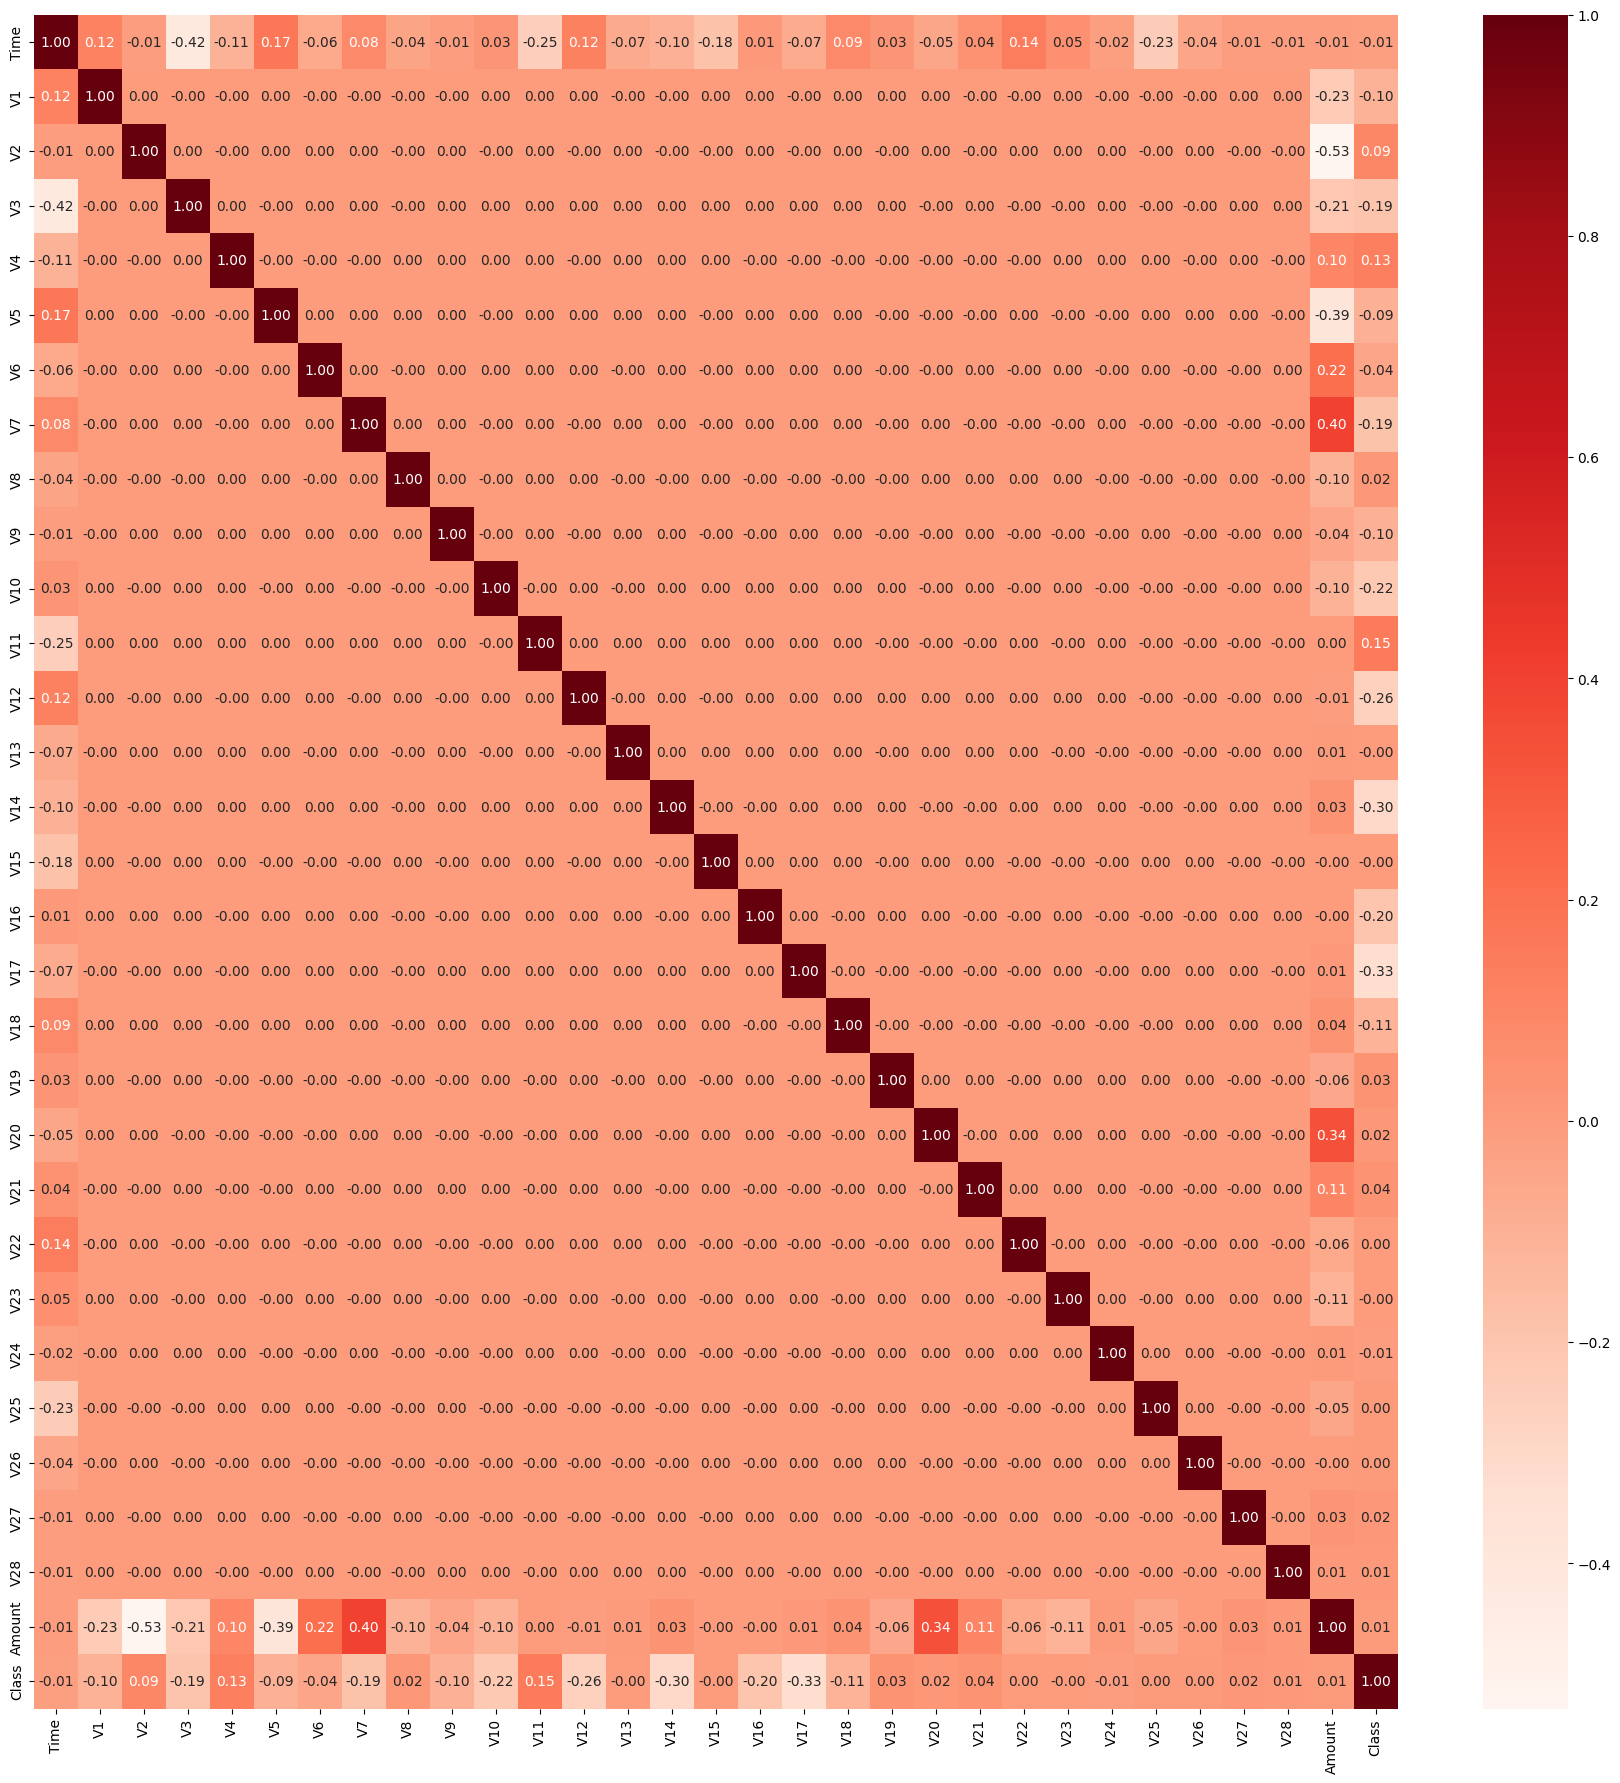

In [17]:
correlationMatrix = data.corr()
plt.figure(figsize=(22,22))
sns.heatmap(correlationMatrix, annot=True, cmap=plt.cm.Reds, fmt='.2f')
plt.show()

🇺🇸: The matrix indicates the variables that have lesser or greater influence on the other variables in the dataset. The variables Vn do not have a direct relation among themselves, but they do influence the 'Time', 'Class', and 'Amount' variables.

🇫🇷: Le matrice nous dit les variables que ont moins ou plus d'influence avec les autres variables du jeu de données. Les variables Vn n'ont pas de realtion directe entre elles, mais elles influencent les variables "Time", "Class" et "Amount". 

### **3rd Stage (3ème Étape):**

In [68]:
from sklearn.model_selection import train_test_split
# We will convert de DF in to a Numpy array to can make the calculations of Perceptron
# We will use the Perceptron algorithm to train the model
np_data = np.array(data)
np_x = np_data[:, 1:30]
np_y = np_data[:, -1]

# Spliting the data in train and test with 80% and 20% respectively
m, n = np_data.shape
print(f"Data Shape: {m} lines and {n} columns")
data_train = np_data[:int(0.8*m)]
data_test = np_data[int(0.8*m):]

x_train = data_train[:, 1:n-1]
y_train = data_train[:, -1]

x_test = data_test[1:n-1]
y_test = data_test[:, -1]

print("Split Data Shape:", data_test.shape, data_train.shape)
print("Split Data Shape of X and Y train:", x_train.shape, y_train.shape)
print("Split Data Shape of X and Y test:", x_test.shape, y_test.shape)

Data Shape: 284807 lines and 31 columns
Split Data Shape: (56962, 31) (227845, 31)
Split Data Shape of X and Y train: (227845, 29) (227845,)
Split Data Shape of X and Y test: (29, 31) (56962,)


In [69]:
# Sigmoid function
def sigmoid(x):
    s = 1/(1+np.exp(-x))
    return s

def sigmoid_derivative(x):
    return x * (1 - x)

def ReLU(Z):
    return np.maximum(0, Z)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def softmax(Z):
    return np.exp(Z) / np.sum(np.exp(Z), axis=0)

In [73]:
def init_params(X, Y):
    # We need take the number of input, hidden and output neurons
    h_numb = 5
    inp_numb = X.shape[0]
    outp_numb = Y.shape[0]

    W1 = np.random.randn(h_numb, inp_numb) * 0.01
    b1 = np.zeros((h_numb,1))
    W2 = np.random.randn(outp_numb,h_numb) * 0.01
    b2 = np.zeros((outp_numb,1))
    return W1, b1, W2, b2

def foward_prop(W1, b1, W2, b2, X):
    Z1 = np.dot(W1, X) + b1
    A1 = ReLU(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = ReLU(Z2)
    return Z1, A1, Z2, A2

def train_perceptron(X, y, learning_rate, epochs):
    np.random.seed(42)
    
    # Inicialização dos pesos e bias para a camada oculta e de saída
    input_size = X.shape[1]
    hidden_layer_size = 5
    output_size = 1
    
    W1 = np.random.randn(hidden_layer_size, input_size)
    b1 = np.zeros((hidden_layer_size, 1))
    W2 = np.random.randn(output_size, hidden_layer_size)
    b2 = np.zeros((output_size, 1))
    
    for epoch in range(epochs):
        # Forward propagation
        Z1 = np.dot(W1, X.T) + b1
        A1 = relu(Z1)
        Z2 = np.dot(W2, A1) + b2
        A2 = sigmoid(Z2)  # Aplique sigmoid na saída da última camada para classificação
        
        # Calculando o erro
        error = y - A2
        
        # Backpropagation
        dZ2 = error * sigmoid_derivative(A2)
        dW2 = np.dot(dZ2, A1.T) / X.shape[0]
        db2 = np.sum(dZ2, axis=1, keepdims=True) / X.shape[0]
        
        dZ1 = np.dot(W2.T, dZ2) * relu_derivative(A1)
        dW1 = np.dot(dZ1, X) / X.shape[0]
        db1 = np.sum(dZ1, axis=1, keepdims=True) / X.shape[0]
        
        # Atualização dos pesos e bias
        W2 += learning_rate * dW2
        b2 += learning_rate * db2
        W1 += learning_rate * dW1
        b1 += learning_rate * db1
        
    return {"W1": W1, "b1": b1, "W2": W2, "b2": b2}

# Dados de exemplo para treinamento
X_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_train = np.array([[0], [1], [1], [0]])

# Parâmetros de treinamento
learning_rate = 0.1
epochs = 10000

# Treinamento do perceptron com ReLU
trained_params = train_perceptron(X_train, y_train, learning_rate, epochs)

# Função para fazer previsões
def predict(X, params):
    Z1 = np.dot(params["W1"], X.T) + params["b1"]
    A1 = relu(Z1)
    Z2 = np.dot(params["W2"], A1) + params["b2"]
    A2 = sigmoid(Z2)
    
    predictions = (A2 > 0.5).astype(in)

def back_prop(Z1, A1, Z2, A2, W2, Y):
    